# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [115]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_df= pd.DataFrame(columns =["City"])
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list


    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)
for city in cities:
    city_df = city_df.append({"City": city,}, ignore_index=True)

len(city_df["City"])
city_df.head()

,City
0,hervey bay
1,hovd
2,fort nelson
3,taolanaro
4,santa cruz


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [116]:
#Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

city_counter = 0
print("Beginning Data Retrieval")
print("------------------------")

for index, row in city_df.iterrows():

    city_name = row['City']
    city_counter = city_counter+1
    url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=imperial"
    weather_response = requests.get(url).json()

    if weather_response["cod"] == '404':
        print("City not found... skipping.")

    else:
        print(f"Processing Record {city_counter} | {city_name}")
        city_df.loc[index, "City"] = weather_response["name"]
        city_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        city_df.loc[index, "Country"] = weather_response["sys"]["country"]
        city_df.loc[index, "Date"] = weather_response["dt"]
        city_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        city_df.loc[index, "Lat"] = weather_response["coord"]["lat"]
        city_df.loc[index, "Long"] = weather_response["coord"]["lon"]
        city_df.loc[index, "Max Temp(F)"] = weather_response["main"]["temp_max"]
        city_df.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]

print("------------------------")      
print("Data Retrieval Complete")
print("------------------------")
                                
    

Beginning Data Retrieval
------------------------
Processing Record 1 | hervey bay
Processing Record 2 | hovd
Processing Record 3 | fort nelson
City not found... skipping.
Processing Record 5 | santa cruz
Processing Record 6 | leninskoye
Processing Record 7 | port elizabeth
Processing Record 8 | puerto ayora
City not found... skipping.
Processing Record 10 | maceio
Processing Record 11 | lasa
City not found... skipping.
Processing Record 13 | jamestown
Processing Record 14 | hithadhoo
Processing Record 15 | lazaro cardenas
Processing Record 16 | ushuaia
Processing Record 17 | oudtshoorn
Processing Record 18 | saint-georges
Processing Record 19 | hilo
Processing Record 20 | nanortalik
Processing Record 21 | katherine
Processing Record 22 | laguna
Processing Record 23 | saint george
Processing Record 24 | torrijos
Processing Record 25 | morondava
Processing Record 26 | bandarbeyla
City not found... skipping.
Processing Record 28 | hobart
Processing Record 29 | busselton
Processing Record

Processing Record 250 | lipin bor
Processing Record 251 | aktau
City not found... skipping.
Processing Record 253 | anadyr
Processing Record 254 | padang
Processing Record 255 | batemans bay
Processing Record 256 | sarakhs
Processing Record 257 | muisne
Processing Record 258 | hualmay
Processing Record 259 | bolama
Processing Record 260 | den helder
Processing Record 261 | mogadishu
Processing Record 262 | vanimo
Processing Record 263 | lamu
Processing Record 264 | broome
Processing Record 265 | coari
Processing Record 266 | cherskiy
Processing Record 267 | kavieng
Processing Record 268 | rayachoti
Processing Record 269 | moose factory
Processing Record 270 | xichang
City not found... skipping.
Processing Record 272 | raudeberg
Processing Record 273 | sorada
Processing Record 274 | sambava
Processing Record 275 | sarkand
Processing Record 276 | pangnirtung
Processing Record 277 | luderitz
Processing Record 278 | tuatapere
Processing Record 279 | coahuayana
Processing Record 280 | tatey

Processing Record 503 | vostok
Processing Record 504 | finschhafen
Processing Record 505 | bealanana
Processing Record 506 | barentu
Processing Record 507 | victor harbor
Processing Record 508 | dukat
Processing Record 509 | moerai
Processing Record 510 | bolshaya dzhalga
Processing Record 511 | leningradskiy
City not found... skipping.
Processing Record 513 | saquena
Processing Record 514 | mazatlan
Processing Record 515 | mursalimkino
City not found... skipping.
City not found... skipping.
Processing Record 518 | kalevala
Processing Record 519 | baghdad
Processing Record 520 | lensk
Processing Record 521 | rorvik
Processing Record 522 | kjollefjord
Processing Record 523 | mokrous
Processing Record 524 | okahandja
Processing Record 525 | uvat
Processing Record 526 | humaita
Processing Record 527 | antsohihy
Processing Record 528 | taksimo
Processing Record 529 | udachnyy
Processing Record 530 | saint-francois
Processing Record 531 | maldonado
Processing Record 532 | caravelas
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
#Converting date from UTC to dateformat
city_df["Date"] = pd.to_datetime(city_df['Date'], unit = 's')

city_df["Date"] = city_df["Date"].dt.strftime('%m-%d-%y')
#Displaying datafram after removing the NaN rows
city_df = city_df.dropna()
city_df


,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp(F),Wind Speed
0,Hervey Bay,48.0,AU,03-24-19,78.0,-25.30,152.85,86.00,4.70
1,Hovd,90.0,NO,03-24-19,100.0,63.83,10.70,37.99,4.70
2,Fort Nelson,20.0,CA,03-24-19,37.0,58.81,-122.69,51.80,11.41
4,Santa Cruz,1.0,US,03-24-19,55.0,36.97,-122.03,70.00,8.05
5,Leninskoye,0.0,RU,03-24-19,79.0,54.82,82.85,28.40,4.47
6,Port Elizabeth,1.0,US,03-24-19,30.0,39.31,-74.98,60.80,5.82
7,Puerto Ayora,0.0,EC,03-24-19,74.0,-0.74,-90.35,84.20,9.17
9,Maceio,20.0,BR,03-24-19,78.0,-9.67,-35.74,80.60,8.05
10,Lasa,0.0,CY,03-24-19,53.0,34.92,32.53,55.40,11.41
12,Jamestown,76.0,AU,03-24-19,72.0,-33.21,138.60,58.71,16.35


In [121]:
#Exporting the city data to csv
city_df.to_csv("CityWeatherData_Output.csv",encoding="utf-8", index=False)
city_df.count()

City           572
Cloudiness     572
Country        572
Date           572
Humidity       572
Lat            572
Long           572
Max Temp(F)    572
Wind Speed     572
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

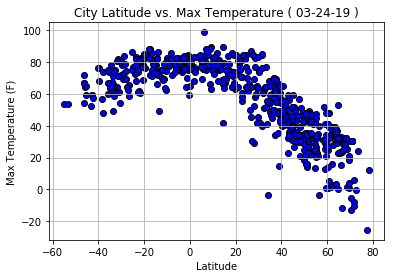

In [122]:

plt.scatter(city_df["Lat"], city_df["Max Temp(F)"], 
           marker ='o', facecolors ="blue", edgecolors='black',alpha = 1)

plt.grid(True)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ( %s )" % (city_df["Date"].iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Lat_Temp_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

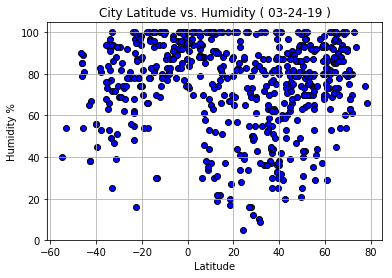

In [123]:

plt.scatter(city_df["Lat"], city_df["Humidity"], 
           marker ='o', facecolors ="blue", edgecolors='black',alpha = 1)

plt.grid(True)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ( %s )" % (city_df["Date"].iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("Lat_Humidity_Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

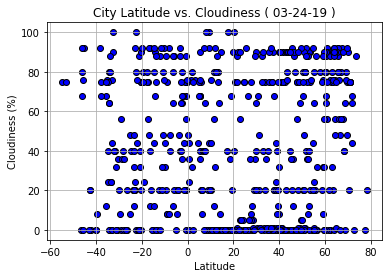

In [124]:

plt.scatter(city_df["Lat"], city_df["Cloudiness"], 
           marker ='o', facecolors ="blue", edgecolors='black',alpha = 1)

plt.grid(True)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ( %s )" % (city_df["Date"].iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_Cloudiness_Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

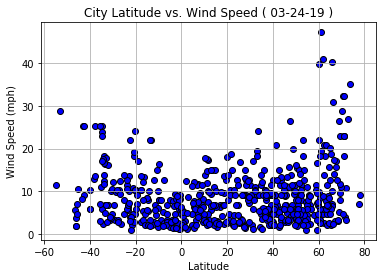

In [125]:

plt.scatter(city_df["Lat"], city_df["Wind Speed"], 
           marker ='o', facecolors ="blue", edgecolors='black',alpha = 1)

plt.grid(True)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ( %s )" % (city_df["Date"].iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_WindSpeed_Plot.png")
plt.show()